In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from comet_ml import Experiment
import numpy as np
import scipy.spatial
import pandas as pd
import comet_ml
import sklearn.decomposition
import matplotlib.pyplot as plt
# import keras
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances,mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from utils.readProfiles import readMergedProfiles,readMergedProfiles2
from utils.pred_models import *
from utils.saveAsNewSheetToExistingFile import saveAsNewSheetToExistingFile


# from utils import networksEvol, tsne, readProfiles
import umap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# ls

In [7]:
# Resss=pd.read_csv('results-nnC.csv')
# Resss=Resss['nnC'].apply(lambda x: x[1:-1])
# Resss=Resss.astype(float)
# Resss.mean()

In [8]:
# Resss=pd.read_csv('results-replicate-nnC.csv')
# Resss=Resss[['nn','nnC']].apply(lambda x: x[1:-1])
# Resss=Resss.astype(float)
# Resss.mean()

In [9]:
# x=pd.read_csv(dataDir+"TAOE014015_CellPainting_Resnet/morphology.csv")
# x.columns[x.columns.str.contains('etadata')]

In [10]:
# x.columns[x.columns.str.contains('url')]

In [16]:
pwd

'/home/marziehhaghighi/workspace_rosetta/workspace/software/2018_04_20_Rosetta'

In [24]:
# dataDir="~/workspace_rosetta/workspace/collated/"
# l1k = multimodal_data.load_l1000(dataDir+"TAOE014015_L1000/replicate_level_all_alleles.csv")
# cp = multimodal_data.load_cell_painting(
#     dataDir+"TAOE014015_CellPainting_Resnet/morphology.csv", 
#     dataDir+"TAOE014015_CellPainting_Resnet/resnet18-validation-well_profiles.csv", 
#     aggregate_replicates=False
# )
# print(l1k.shape,cp.shape)
# l1k_features
# cp_features
# mergProf_treatLevel

# Load data



- CDRPBIO-BBBC047-Bray-CP-GE (Cell line: U2OS):
    * There are 30,430 and 21,782 unique compounds for CP and GE datasets, respectively.
    * Median number of replicates for each dataset is as follows: CP: ~4 , GE: ~3. 
    * 20,358 compounds are present in both datasets.
    * Replicate Level Shapes (nSamples x nFeatures): cp:  (153386 , 1783) ,  ge:  (68120 , 977)
    * Treatment Level Shapes (nSamples x nFeatures): cp:  (30430, 1786)   ,  ge:  (21782, 981) 
    * Merged Profiles Shape:                              (20358, 2766)
    
    
- LUAD-BBBC041-Caicedo-CP-GE (Cell line: A549) : 
    * There are 593 and 529 unique alleles for CP and GE datasets, respectively.
    * Median number of replicates for each dataset is as follows: CP: ~8, GE: ~8.
    * 525 alleles are present in both datasets.
    * Replicate Level Shapes (nSamples x nFeatures): cp:  (6144 , 1783) ,  ge:  (4232 , 978)
    * Treatment Level Shapes (nSamples x nFeatures): cp: (593, 1786) , ge: (529, 979) 
    * Merged Profiles Shape:                             (525, 2764)    
    
    
- TA-ORF-BBBC037-Rohban-CP-GE (Cell line: U2OS) :
    * There are 299 and 226 number of unique compounds for CP and GE datasets respectively.
    * Median number of replicates for each dataset is as follows: CP: ~5 , GE: ~2.
    * 188 alleles are present in both datasets.
    * Replicate Level Shapes (nSamples x nFeatures):         cp: (1920 , 1783) ,  ge: (729 , 978)
    * Treatment Level Shapes (nSamples x nFeatures+metadata):cp: (323, 1784)   ,  ge: (328, 979)
    * Merged Profiles Shape:                                     (149, 2762)
    
    
- LINCS-Pilot1-CP-GE (Cell line: A549) :
    * There are 1570 unique compounds across 7 doses for CP dataset
    * There are x unique compounds across 7 doses for GE dataset
    * Median number of replicates for each dataset is as follows: CP: ~5 , GE: ~3.
    * 6984 "compounds-dose" are present in both datasets. 
    * Replicate Level Shapes (nSamples x nFeatures):         cp: (52223 , 1747) ,  ge: (27837 , 978)
    * Treatment Level Shapes (nSamples x nFeatures+metadata):cp: (9394, 1748)   ,  ge: (8370, 979)
    * Merged Profiles Shape:                                     (6984, 2726)


In [37]:
ls ../../results/RepCor/RepCorrDF.xlsx

RepCorrDF2.xlsx  RepCorrDF.xlsx


In [18]:
#'dataset_name',['folder_name',[cp_pert_col_name,l1k_pert_col_name],[cp_control_val,l1k_control_val]]
profileType='normalized'
ds_info_dict={'CDRP':['CDRPBIO-BBBC036-Bray',['Metadata_broad_sample','pert_id_dose'],[['DMSO_0.04'],['DMSO_-666']]],
              'TAORF':['TA-ORF-BBBC037-Rohban',['Metadata_broad_sample','pert_id',],[['DMSO_0.04'],['DMSO_-666']]],
              'LUAD':['LUAD-BBBC041-Caicedo',['x_mutation_status','allele'],[['DMSO_0.04'],['DMSO_-666']]],
              'LINCS':['LINCS-Pilot1',['Metadata_pert_id_dose','pert_id_dose'],[[np.nan],['DMSO_-666']]]}

dataDir='./preprocessed_data/'+ds_info_dict[dataset][0]+'/'

cp_data_repLevel=pd.read_csv(dataDir+'/CellPainting/replicate_level_cp_'+profileType+'.csv.gz')    
l1k_data_repLevel=pd.read_csv(dataDir+'/L1000/replicate_level_l1k.csv.gz')  

/home/ubuntu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (18,19,1820,1821) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:
cp_features=cp_data_repLevel.columns[cp_data_repLevel.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist()
cp_data_repLevel2=cp_data_repLevel[set(cp_data_repLevel.columns.tolist())-set(cp_features)]#['Metadata_pert_id_dose']
cp_data_repLevel2.to_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/results/synth_meta/meta_lincs_repLevel.csv", index=False)

In [69]:
# # features to analyse
# cp_features=cp_data_repLevel.columns[cp_data_repLevel.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist()
# l1k_features=l1k_data_repLevel.columns[l1k_data_repLevel.columns.str.contains("_at")].tolist()



# ########## removes nans and infs
# l1k_data_repLevel=l1k_data_repLevel.replace([np.inf, -np.inf], np.nan)
# cp_data_repLevel=cp_data_repLevel.replace([np.inf, -np.inf], np.nan)
# cols2remove0=[i for i in cp_features if (cp_data_repLevel[i].isnull().sum(axis=0)/cp_data_repLevel.shape[0])>0.05]
# # cols2removeCP=[i for i in cp.columns.tolist() if cp[i].isnull().sum(axis=0)>0]
# #     print(cols2removeCP)
# #     print(len(cp_features))

# #     cols2remove0=[i for i in cpFeatures if ((pd_df[i]=='nan').sum(axis=0)/pd_df.shape[0])>0.05]
# #     print(cols2remove0)

# #     cols2remove1=cpFeatures[pd_df[cpFeatures].std().values<0.00001].tolist()
# cols2remove1=cp_data_repLevel[cp_features].std()[cp_data_repLevel[cp_features].std() < 0.0001].index.tolist()
# #     print(cols2remove1)    
# cols2removeCP=cols2remove0+cols2remove1
# #     print(cols2removeCP)

# cp_features = list(set(cp_features) - set(cols2removeCP))
# #     print(len(cp_features))
# cp_data_repLevel=cp_data_repLevel.drop(cols2removeCP, axis=1);
# cp_data_repLevel[cp_features] = cp_data_repLevel[cp_features].interpolate()

# cols2removeCP=[i for i in cp_features if cp_data_repLevel[i].isnull().sum(axis=0)>0]
# #     print(cols2removeCP)

# #     cp=cp.fillna(cp.median())

# # cols2removeGE=[i for i in l1k.columns if l1k[i].isnull().sum(axis=0)>0]
# # print(cols2removeGE)
# # l1k_features = list(set(l1k_features) - set(cols2removeGE))
# # print(len(l1k_features))
# # l1k=l1k.drop(cols2removeGE, axis=1);
# l1k_data_repLevel[l1k_features] = l1k_data_repLevel[l1k_features].interpolate()
# # l1k=l1k.fillna(l1k.median())



# # ################ Per plate scaling 
# # cp_data_repLevel = standardize_per_catX(cp_data_repLevel,'Metadata_Plate',cp_features);
# # l1k_data_repLevel = standardize_per_catX(l1k_data_repLevel,'det_plate',l1k_features);    
# # cols2removeCP=[i for i in cp_features if (cp_data_repLevel[i].isnull().sum(axis=0)/cp_data_repLevel.shape[0])>0.05]
# # cp_data_repLevel=cp_data_repLevel.drop(cols2removeCP, axis=1);
# # cp_features = list(set(cp_features) - set(cols2removeCP))
# # cp_data_repLevel[cp_features] = cp_data_repLevel[cp_features].interpolate()

# rename columns that should match
labelCol='PERT'
#     print(cp_data_repLevel[ds_info_dict[dataset][1][0]])
cp_data_repLevel=cp_data_repLevel.rename(columns={ds_info_dict[dataset][1][0]:labelCol})
l1k_data_repLevel=l1k_data_repLevel.rename(columns={ds_info_dict[dataset][1][1]:labelCol})    


###### print some data statistics
print(dataset+': Replicate Level Shapes (nSamples x nFeatures): cp: ',\
      cp_data_repLevel.shape[0],',',len(cp_features),  ',  l1k: ',l1k_data_repLevel.shape[0],',',len(l1k_features))

print('l1k n of rep: ',l1k_data_repLevel.groupby([labelCol]).size().median())
print('cp n of rep: ',cp_data_repLevel.groupby([labelCol]).size().median())


###### remove perts with low rep corr
if 1:
    highRepPerts = highRepFinder(dataset) + ['DMSO'];
    cp_data_repLevel=cp_data_repLevel[cp_data_repLevel['PERT'].isin(highRepPerts)].reset_index()
    l1k_data_repLevel=l1k_data_repLevel[l1k_data_repLevel['PERT'].isin(highRepPerts)].reset_index()        

####### form treatment level profiles
l1k_data_treatLevel=l1k_data_repLevel.groupby(labelCol)[l1k_features].mean().reset_index();
cp_data_treatLevel=cp_data_repLevel.groupby(labelCol)[cp_features].mean().reset_index();


CDRP: Replicate Level Shapes (nSamples x nFeatures): cp:  153386 , 1565 ,  l1k:  68120 , 977
l1k n of rep:  3.0
cp n of rep:  4.0
CP: from  30413  to  7838
l1k: from  21001  to  2833
CP and l1k high rep overlap:  863


In [5]:
# highRepPerts

In [68]:
def highRepFinder(dataset):
    repCorDF=pd.read_excel('../../results/RepCor/RepCorrDF.xlsx', sheet_name=None)
    cpRepDF=repCorDF['cp-'+dataset.lower()]
    cpHighList=cpRepDF[cpRepDF['RepCor']>cpRepDF['Rand90Perc']]['Unnamed: 0'].tolist()
    print('CP: from ',cpRepDF.shape[0],' to ',len(cpHighList))
    cpRepDF=repCorDF['l1k-'+dataset.lower()]
    l1kHighList=cpRepDF[cpRepDF['RepCor']>cpRepDF['Rand90Perc']]['Unnamed: 0'].tolist()
    highRepPerts=list(set(l1kHighList) & set(cpHighList))
    print('l1k: from ',cpRepDF.shape[0],' to ',len(l1kHighList))
    print('CP and l1k high rep overlap: ',len(highRepPerts))
    return highRepPerts

In [51]:
cp_data_repLevel['Metadata_Sample_Dose']

0          BRD-K18250272-003-03-7_6.05
1          BRD-K18316707-001-01-9_10.0
2          BRD-K18438502-001-02-6_10.0
3          BRD-K18550767-001-02-8_10.0
4          BRD-K18574842-323-03-3_4.39
                      ...             
153381     BRD-K17405724-001-01-0_9.83
153382     BRD-K90170141-001-01-5_9.72
153383    BRD-K45307499-001-01-7_10.22
153384     BRD-K84521261-001-01-1_9.92
153385     BRD-K78922936-001-01-4_9.69
Name: Metadata_Sample_Dose, Length: 153386, dtype: object

In [52]:
l1k_data_repLevel['pert_sample_dose']

0        BRD-K07762753-001-03-6_50.0
1        BRD-K09991945-001-02-0_12.7
2        BRD-K46678324-001-03-7_50.0
3        BRD-K67860401-001-02-3_16.2
4        BRD-K52620403-001-01-8_12.5
                    ...             
68115    BRD-K64610608-001-02-6_20.0
68116    BRD-K89626439-001-01-0_20.0
68117    BRD-K42541148-001-01-9_20.0
68118    BRD-K05398757-001-02-9_40.0
68119    BRD-K64610608-001-02-6_20.0
Name: pert_sample_dose, Length: 68120, dtype: object

In [65]:
len(set(l1k_data_repLevel['pert_sample_dose'].unique().tolist()) & set(cp_data_repLevel['Metadata_Sample_Dose'].unique().tolist()))

20129

In [64]:
len(set(l1k_data_repLevel['pert_sample_dose'].unique().tolist()))

21850

In [34]:
# l1k_data_repLevel['pert_id_dose']
l1k_data_repLevel.columns[l1k_data_repLevel.columns.str.contains('moa')]

Index(['moa'], dtype='object')

In [36]:
# cp_data_repLevel['Metadata_pert_id_dose']
# l1k_data_repLevel.groupby(['moa']).size()

In [37]:
# cpRepDF.shape
# cp_data_repLevel.groupby(['Metadata_moa']).size()

In [38]:
# cp_data_repLevel.groupby(['moa']).size()

In [63]:
# cp_data_repLevel.groupby(['alternative_moa']).size()
mergProf_treatLevel.shape

(0, 2548)

In [16]:
dataset_rootDir='./';pertColName='PERT'

# dataset options: 'CDRP' , 'LUAD', 'TAORF', 'LINCS'
dataset='LINCS';

# CP Profile Type options: 'augmented' , 'normalized', 'normalized_variable_selected'
profileType='normalized'
profileLevel='treatment'; #'replicate'  or  'treatment'

# n of samples for replicate picking options: numbers or, 'max'
nRep=8
mergProf_repLevel,mergProf_treatLevel,cp_features,l1k_features=\
readMergedProfiles(dataset_rootDir,dataset,profileType,profileLevel,nRep);
# mergProf_repLevel,mergProf_treatLevel,l1k_features,cp_features,pertColName=readMergedProfiles(dataset,profileType,nRep)
# cp_features,l1k_features=cp_features.tolist(),l1k_features.tolist()


if profileLevel=='replicate':
    l1k=mergProf_repLevel[[pertColName]+l1k_features]
    cp=mergProf_repLevel[[pertColName]+cp_features]
elif profileLevel=='treatment':
    l1k=mergProf_treatLevel[[pertColName]+l1k_features]
    cp=mergProf_treatLevel[[pertColName]+cp_features]


scaler_ge = preprocessing.StandardScaler()
scaler_cp = preprocessing.StandardScaler()
l1k_scaled=l1k.copy()
l1k_scaled[l1k_features] = scaler_ge.fit_transform(l1k[l1k_features].values)
cp_scaled=cp.copy()
cp_scaled[cp_features] = scaler_cp.fit_transform(cp[cp_features].values.astype('float64'))

if 1:
    cp=cp_scaled.copy()
    l1k=l1k_scaled.copy()

/home/ubuntu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (18,19,1820,1821) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


LINCS: Replicate Level Shapes (nSamples x nFeatures): cp:  52223 , 1670 ,  l1k:  27837 , 978
l1k n of rep:  3.0
cp n of rep:  5.0
CP: from  9394  to  4647
l1k: from  8369  to  2338
CP and l1k high rep overlap:  1140
Treatment Level Shapes (nSamples x nFeatures+metadata): (8892, 1675) (1141, 980) Merged Profiles Shape: (8892, 2654)


In [15]:
mergProf_treatLevel.shape

(1141, 2652)

In [17]:
mergProf_treatLevel.to_csv('/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/results/synth_meta/mergProf_treatLevel_lincs.csv.gz',index=False,compression='gzip')

In [161]:
# common_genes=list(set(sorted_gene_mean_scores['index'].values) & set(prot_gen_cor.index))
# prot_gen_cor.loc[common_genes,:]
# sorted_gene_mean_scores['index'].values.tolist()
# pred_eval_df["corr1"].values


In [162]:
# sorted_gene_mean_scores[sorted_gene_mean_scores['index'].isin(common_genes)]

In [180]:
pd.read_excel('../../results/RepCor/RepCorrDF.xlsx', sheet_name=None).keys()

dict_keys(['l1k-taorf', 'l1k-luad', 'l1k-lincs', 'cp-luad', 'cp-taorf', 'cp-lincs'])

In [5]:
# set(sorted_gene_mean_scores.index)
# pred_df
# sorted_gene_mean_scores

### Single Gene prediction cross validation

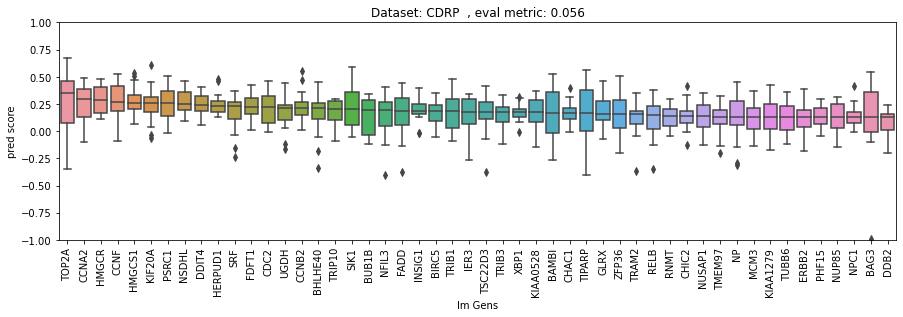

In [3]:
k_fold=20
pred_df=pd.DataFrame(index=range(k_fold),columns=l1k_features)
for l in l1k_features:
    scores=lasso_cv(cp[cp_features],l1k[l],k_fold)
    pred_df[l]=scores

########################### mapping prob_ids to genes names    
meta=pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/affy_probe_gene_mapping.txt",delimiter="\t",header=None, names=["probe_id", "gene"])
meta_gene_probID=meta.set_index('probe_id')
d = dict(zip(meta_gene_probID.index, meta_gene_probID['gene']))
pred_df = pred_df.rename(columns=d)    
    
########################### plot prediction scores sorted by the median across all folds scores
sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
highPredDF=pd.melt(pred_df[sorted_gene_mean_scores[0:50]['index'].values.tolist()]).rename(columns={'variable':'lm Gens','value':'pred score'})

f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lm Gens", y="pred score", data=highPredDF,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(-1, 1)


########################### evluation based on Correlation with protein abundance
prot_gen_cor=pd.read_csv('/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/proteome-transcriptome-abundance/Table_EV2_corrs.csv',index_col='Unnamed: 0')
# sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
common_genes=list(set(sorted_gene_mean_scores['index'].values) & set(prot_gen_cor.index))

sorted_gene_mean_scores2=sorted_gene_mean_scores.set_index('index')
pred_eval_df=pd.concat([prot_gen_cor.loc[common_genes,:], sorted_gene_mean_scores2.loc[common_genes,:]], axis=1)
pred_eval_cc=scipy.stats.pearsonr(np.squeeze(pred_eval_df["corr1"].values), np.squeeze(pred_eval_df[0].values))[0]
axes.set_title("Dataset: "+dataset+"  , eval metric: "+str(np.round(pred_eval_cc,3)));

########################## Save prediction score results
filename='../../results/SingleGenePred/scores.xlsx'
saveAsNewSheetToExistingFile(filename,sorted_gene_mean_scores.rename(columns={'index':'lm_Gens',0:'pred_score'}),'Lasso-'+dataset)

In [8]:
# scipy.stats.pearsonr(np.squeeze(pred_eval_df["corr1"].values), np.squeeze(pred_eval_df[0].values))[0]
saved_scores=pd.read_excel('../../results/SingleGenePred/scores.xlsx', sheet_name=None)
saved_scores_lasso=saved_scores['Lasso-'+dataset]
saved_scores_lasso.head()

,Unnamed: 0,lm_Gens,pred_score
0,143,CDKN1A,0.845959
1,136,CDC2,0.827220
2,115,CCNA2,0.771751
3,322,GADD45A,0.747613
4,963,YKT6,0.746184


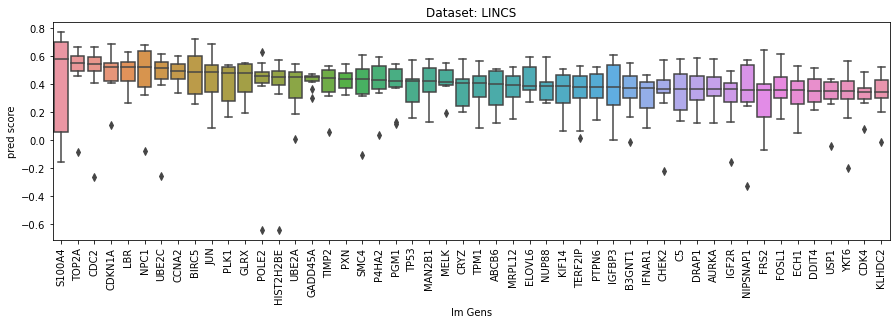

In [114]:
sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
highPredDF=pd.melt(pred_df[sorted_gene_mean_scores[0:50]['index'].values.tolist()]).rename(columns={'variable':'lm Gens','value':'pred score'})

f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lm Gens", y="pred score", data=highPredDF,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);

### Correlation with protein abundance

In [178]:
sorted_gene_mean_scores2

,0
index,
BIRC5,0.502725
LBR,0.500016
CDC2,0.489846
CDKN1A,0.482708
UBE2C,0.482007
...,...
IKBKAP,-0.085463
KDELR2,-0.085926
SCRN1,-0.089661


In [102]:
# highPredDF

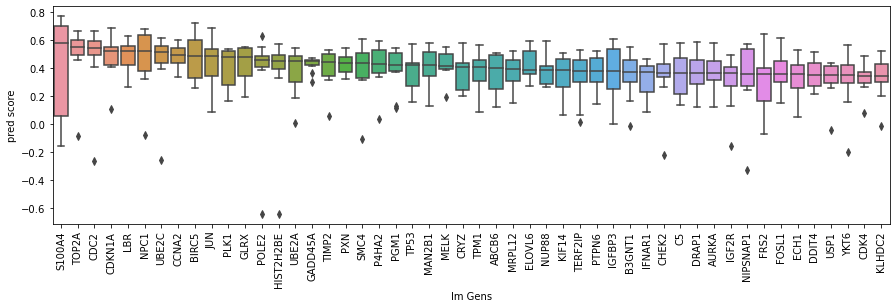

In [113]:
f, axes = plt.subplots(figsize=(15,4))

# for d in range(len(doses)):
#     sns.boxplot(x="Metadata_moa", y="fVal", hue="fName", \
#                 data=df_grouped_bxplt[df_grouped_bxplt['Metadata_mg_per_ml_rounded']==doses[d]].reset_index(drop=True), palette="Set1",ax=axes[d])
#     axes[d].set_title("Dose: "+str(doses[d]))
#     axes[d].set_xticklabels(axes[d].get_xticklabels(),rotation=90,fontsize=10);
#     axes[d].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=10)
sns.boxplot(x="lm Gens", y="pred score", data=highPredDF,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);

In [54]:
scores

array([0.38638464, 0.27816457, 0.39661721, 0.27745571, 0.26364289,
       0.14565819, 0.27624536, 0.19623219, 0.30090798, 0.15817473])

In [32]:
np.any(np.isnan(cp[cp_features[0:100]].values))

True

In [42]:
np.any(np.isnan(cp[cp_features].values))

True

In [37]:
cp.interpolate(method="linear", inplace=True)

In [22]:
cp=mergProf_treatLevel.copy()
cols2removeCP=[i for i in cp_features if (cp[i].isnull().sum(axis=0)/cp.shape[0])>0.05]
print(cols2removeCP)
cp=cp.drop(cols2removeCP, axis=1);
cp_features2 = list(set(cp_features) - set(cols2removeCP))
cp[cp_features2]=cp[cp_features2].interpolate()
cols2removeCP=[i for i in cp_features2 if cp[i].isnull().sum(axis=0)>0]
print(cols2removeCP)

[]
[]


In [10]:
mergProf_treatLevel.drop_duplicates(subset=None, keep="first", inplace=False).shape
# mergProf_treatLevel

(1141, 2726)

### Single CP feature prediction cross validation

In [ ]:
k_fold=20
pred_df=pd.DataFrame(index=range(k_fold),columns=cp_features)
for c in cp_features:
    scores=lasso_cv(l1k[l1k_features],cp[c],k_fold)
    pred_df[c]=scores

# ########################### mapping prob_ids to genes names    
# meta=pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/affy_probe_gene_mapping.txt",delimiter="\t",header=None, names=["probe_id", "gene"])
# meta_gene_probID=meta.set_index('probe_id')
# d = dict(zip(meta_gene_probID.index, meta_gene_probID['gene']))
# pred_df = pred_df.rename(columns=d)    
    
########################### plot prediction scores sorted by the median across all folds scores
sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
highPredDF=pd.melt(pred_df[sorted_gene_mean_scores[0:80]['index'].values.tolist()]).rename(columns={'variable':'CP feats','value':'pred score'})

f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="CP feats", y="pred score", data=highPredDF,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(0, 1)


# ########################### evluation based on Correlation with protein abundance
# prot_gen_cor=pd.read_csv('/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/proteome-transcriptome-abundance/Table_EV2_corrs.csv',index_col='Unnamed: 0')
# # sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
# common_genes=list(set(sorted_gene_mean_scores['index'].values) & set(prot_gen_cor.index))

# sorted_gene_mean_scores2=sorted_gene_mean_scores.set_index('index')
# pred_eval_df=pd.concat([prot_gen_cor.loc[common_genes,:], sorted_gene_mean_scores2.loc[common_genes,:]], axis=1)
# pred_eval_cc=scipy.stats.pearsonr(np.squeeze(pred_eval_df["corr1"].values), np.squeeze(pred_eval_df[0].values))[0]
# axes.set_title("Dataset: "+dataset+"  , eval metric: "+str(np.round(pred_eval_cc,3)));

########################## Save prediction score results
filename='../../results/SingleCPfeatPred/scores.xlsx'
saveAsNewSheetToExistingFile(filename,sorted_gene_mean_scores.rename(columns={'index':'CP feats',0:'pred_score'}),'Lasso-'+dataset)

In [26]:
dataset

'LINCS'

In [27]:
saved_scores=pd.read_excel('../../results/SingleCPfeatPred/scores.xlsx', sheet_name=None)
saved_scores_lasso=saved_scores['Lasso-'+dataset]
saved_scores_lasso.head()

,Unnamed: 0,CP feats,pred_score
0,138,Cytoplasm_Granularity_16_AGP,0.740094
1,580,Cells_Granularity_12_AGP,0.736100
2,1541,Cytoplasm_Granularity_15_Mito,0.733307
3,486,Cells_Granularity_14_AGP,0.728269
4,108,Nuclei_Texture_InverseDifferenceMoment_DNA_10_0,0.727391


In [28]:
# Potentail visually interpretable features 
v_i_f_list=["Cells_AreaShape_Eccentricity",
    "Nuclei_AreaShape_Area", "Cytoplasm_AreaShape_Area", "Cells_AreaShape_Area",
    "Cells_RadialDistribution_MeanFrac_Mito_4of4",
    "Cells_Intensity_MassDisplacement_AGP",
    "Nuclei_Granularity_1_DNA",
    "Cells_Intensity_MeanIntensityEdge_AGP"]

In [37]:
v_i_f_list2=["Nuclei_AreaShape_Eccentricity",
    "Nuclei_AreaShape_Area", "Cytoplasm_AreaShape_Area", "Cells_AreaShape_Area",
    "Cells_RadialDistribution_MeanFrac_Mito_4of4",
    "Nuclei_Intensity_MassDisplacement_DNA",
    "Cells_Granularity_1_AGP",
    "Cells_Intensity_MeanIntensityEdge_AGP"]

In [38]:
saved_scores_lasso[saved_scores_lasso["CP feats"].isin(v_i_f_list2)]

,Unnamed: 0,CP feats,pred_score
17,309,Cells_Granularity_1_AGP,0.708425
86,1496,Nuclei_AreaShape_Area,0.665405
200,1253,Cells_RadialDistribution_MeanFrac_Mito_4of4,0.598590
220,149,Nuclei_Intensity_MassDisplacement_DNA,0.591571
321,118,Cells_AreaShape_Area,0.556702
338,403,Cytoplasm_AreaShape_Area,0.552584
549,1348,Nuclei_AreaShape_Eccentricity,0.477723
827,1616,Cells_Intensity_MeanIntensityEdge_AGP,0.401995


In [36]:
saved_scores_lasso[saved_scores_lasso["CP feats"].isin(['Nuclei_Intensity_MassDisplacement_AGP',
       'Nuclei_Intensity_MassDisplacement_ER',
       'Cytoplasm_Intensity_MassDisplacement_DNA',
       'Nuclei_Intensity_MassDisplacement_DNA',
       'Cells_Intensity_MassDisplacement_AGP',
       'Cytoplasm_Intensity_MassDisplacement_Mito',
       'Nuclei_Intensity_MassDisplacement_Mito',
       'Nuclei_Intensity_MassDisplacement_RNA',
       'Cytoplasm_Intensity_MassDisplacement_ER',
       'Cells_Intensity_MassDisplacement_DNA',
       'Cells_Intensity_MassDisplacement_ER',
       'Cytoplasm_Intensity_MassDisplacement_RNA',
       'Cytoplasm_Intensity_MassDisplacement_AGP',
       'Cells_Intensity_MassDisplacement_RNA',
       'Cells_Intensity_MassDisplacement_Mito'])]

,Unnamed: 0,CP feats,pred_score
220,149,Nuclei_Intensity_MassDisplacement_DNA,0.591571
332,205,Cytoplasm_Intensity_MassDisplacement_Mito,0.553412
467,1522,Cytoplasm_Intensity_MassDisplacement_AGP,0.507992
537,279,Cells_Intensity_MassDisplacement_Mito,0.482051
696,1628,Nuclei_Intensity_MassDisplacement_Mito,0.437292
898,808,Cells_Intensity_MassDisplacement_AGP,0.382221
1061,909,Nuclei_Intensity_MassDisplacement_RNA,0.333328
1071,232,Cytoplasm_Intensity_MassDisplacement_ER,0.330362
1124,882,Cells_Intensity_MassDisplacement_ER,0.314702
1144,1526,Cells_Intensity_MassDisplacement_RNA,0.306929


### Separate training, Test and validation

In [37]:
con=[]
nTestAlleles=20;
# testAs=l1k[pertColName].sample(nTestAlleles,random_state=0).tolist()
testAs=l1k[pertColName].sample(nTestAlleles,random_state=0).tolist()
# testAs=['MAPK7_WT.c','ARAF_p.S214C','AKR1B1_p.P14R','PPP2R1A_p.V229L','PPP2R1A_p.Q372L',\
# 'IDH2_p.K130del','IDH2_p.S249G','RIT1_p.F82L','RIT1_p.A77P','RBM10_p.W658Y']

trainOverfit=0
con=[]
if trainOverfit:
    l1k_train=l1k.copy();l1k_test=l1k.copy()
    cp_train=cp.copy();cp_test=cp.copy()    
else:
    l1k_train=l1k[~l1k[pertColName].isin(testAs)].reset_index(drop=True)
    l1k_test=l1k[l1k[pertColName].isin(testAs)].reset_index(drop=True)

    cp_train=cp[~cp[pertColName].isin(testAs)].reset_index(drop=True)
#     cp_train[l1k_features] = scaler_ge.fit_transform(l1k[l1k_features].values)
    cp_test=cp[cp[pertColName].isin(testAs)].reset_index(drop=True)

In [105]:
# testAs

# Train Linear Model and Test

In [54]:
reload(networksEvol)
pred_ge_l=networksEvol.linearTransform(l1k_train.loc[:,l1k_features].values,cp_train.loc[:,cp_features].values,l1k_test.loc[:,l1k_features].values,cp_test.loc[:,cp_features].values);
# pred_ge=scaler_ge.fit_transform(pred_ge)

In [56]:
# pred_ge
# l1k_train.loc[:,l1k_features]
# compare_ge
pred_ge_l.shape

(38, 978)

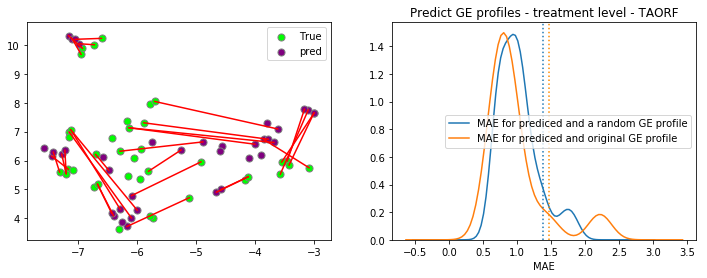

In [55]:
visualizePredictionResults(pred_ge_l)

In [61]:
# visualizePredictionResults()
# pred_ge_mlp.shape
l1k_test.shape

(38, 979)

# Train "MLP" and Test

In [58]:
reload(networksEvol)
pred_ge_mlp=networksEvol.nnTransform(l1k_train,cp_train,l1k_test,cp_test)

COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
COMET INFO:   Data:
COMET INFO:     url: https://www.comet.ml/marziehhaghighi/rosetta-cp2ge-nntransform/b5bb91d1d71c494b8311918f47d8e10f
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     batch_loss [100]               : (0.7253274321556091, 1.0064963102340698)
COMET INFO:     batch_mean_absolute_error [100]: (0.7253274321556091, 1.0064963102340698)
COMET INFO:     batch_pcc [100]                : (0.9780089855194092, 0.9999999403953552)
COMET INFO:     epoch_duration [100]           : (0.07549865357577801, 1.4947363818064332)
COMET INFO:     loss [100]                     : (0.7621104955673218, 0.9898386359214782)
COMET INFO:     lr [100]                       : (9.999999747378752e-05, 9.999999747378752e-05)
COMET INFO:     mean_absolute_error [100]      : (0.7621104955673218, 0.9898386359214782)
COMET INFO:     pcc [100]                      : (0.9779580473899842, 0.9999885201454163)
COMET INFO: 

Total pairs: 556 (556, 63) (556, 978)
Total pairs: 21 (21, 63) (21, 978)
Total pairs: 98 (98, 63) (98, 978)
Epoch 1/100
5/5 [==============================] - 2s 327ms/step - loss: 0.9898 - mean_absolute_error: 0.9898 - pcc: 1.0000 - val_loss: 0.6832 - val_mean_absolute_error: 0.6832 - val_pcc: 0.9998
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 0.9615 - mean_absolute_error: 0.9615 - pcc: 1.0000 - val_loss: 0.6816 - val_mean_absolute_error: 0.6816 - val_pcc: 0.9998
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.9765 - mean_absolute_error: 0.9765 - pcc: 0.9999 - val_loss: 0.6774 - val_mean_absolute_error: 0.6774 - val_pcc: 0.9999
Epoch 4/100
5/5 [==============================] - 0s 29ms/step - loss: 0.9590 - mean_absolute_error: 0.9590 - pcc: 1.0000 - val_loss: 0.6759 - val_mean_absolute_error: 0.6759 - val_pcc: 0.9999
Epoch 5/100
5/5 [==============================] - 0s 30ms/step - loss: 0.9680 - mean_absolute_error: 0.9680 - pcc:

5/5 [==============================] - 0s 27ms/step - loss: 0.7790 - mean_absolute_error: 0.7790 - pcc: 0.9828 - val_loss: 0.6150 - val_mean_absolute_error: 0.6150 - val_pcc: 0.9887
Epoch 85/100
5/5 [==============================] - 0s 31ms/step - loss: 0.7990 - mean_absolute_error: 0.7990 - pcc: 0.9835 - val_loss: 0.6148 - val_mean_absolute_error: 0.6148 - val_pcc: 0.9885
Epoch 86/100
5/5 [==============================] - 0s 19ms/step - loss: 0.8060 - mean_absolute_error: 0.8060 - pcc: 0.9843 - val_loss: 0.6146 - val_mean_absolute_error: 0.6146 - val_pcc: 0.9884
Epoch 87/100
5/5 [==============================] - 0s 26ms/step - loss: 0.7784 - mean_absolute_error: 0.7784 - pcc: 0.9872 - val_loss: 0.6143 - val_mean_absolute_error: 0.6143 - val_pcc: 0.9881
Epoch 88/100
5/5 [==============================] - 0s 16ms/step - loss: 0.8083 - mean_absolute_error: 0.8083 - pcc: 0.9880 - val_loss: 0.6140 - val_mean_absolute_error: 0.6140 - val_pcc: 0.9878
Epoch 89/100
5/5 [====================

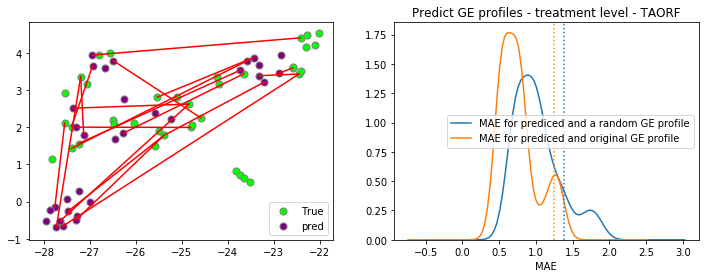

In [44]:
visualizePredictionResults(pred_ge_mlp)

In [63]:
# visualizePredictionResults()
pred_ge_mlpPlus.shape

(38, 978)

# Train "MLP+Reconstruction loss" and Test

In [39]:
reload(networksEvol)
pred_ge_mlpPlus=networksEvol.nnTransformWithCycle(l1k_train,cp_train,l1k_test,cp_test)

COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
COMET INFO:   Data:
COMET INFO:     url: https://www.comet.ml/marziehhaghighi/rosetta-cp2ge/84f28cabbfec400692f37b039f2a2e12
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     batch_dense_52_loss [300]               : (0.5049954056739807, 0.9511601328849792)
COMET INFO:     batch_dense_52_mean_absolute_error [300]: (0.5049954056739807, 0.9511601328849792)
COMET INFO:     batch_dense_52_pcc [300]                : (0.7614057660102844, 0.9999947547912598)
COMET INFO:     batch_dense_56_loss [300]               : (0.10048704594373703, 0.7203341126441956)
COMET INFO:     batch_dense_56_mean_absolute_error [300]: (0.10048704594373703, 0.7203341126441956)
COMET INFO:     batch_dense_56_pcc [300]                : (0.6706788539886475, 0.9999988079071045)
COMET INFO:     batch_loss [300]                        : (5.175134658813477, 10.227813720703125)
COMET INFO:     dense_52_loss [300]                     :

Total pairs: 577 (577, 63) (577, 978)
Total pairs: 98 (98, 63) (98, 978)
Epoch 1/300
5/5 [==============================] - 2s 459ms/step - loss: 10.6360 - dense_60_loss: 0.9713 - dense_64_loss: 0.9230 - dense_60_mean_absolute_error: 0.9713 - dense_60_pcc: 0.9999 - dense_64_mean_absolute_error: 0.9230 - dense_64_pcc: 0.9979 - val_loss: 9.2538 - val_dense_60_loss: 0.8432 - val_dense_64_loss: 0.8213 - val_dense_60_mean_absolute_error: 0.8432 - val_dense_60_pcc: 0.9994 - val_dense_64_mean_absolute_error: 0.8213 - val_dense_64_pcc: 0.9476
Epoch 2/300
5/5 [==============================] - 0s 34ms/step - loss: 10.1629 - dense_60_loss: 0.9266 - dense_64_loss: 0.8964 - dense_60_mean_absolute_error: 0.9266 - dense_60_pcc: 0.9998 - dense_64_mean_absolute_error: 0.8964 - dense_64_pcc: 0.9874 - val_loss: 9.0646 - val_dense_60_loss: 0.8264 - val_dense_64_loss: 0.8009 - val_dense_60_mean_absolute_error: 0.8264 - val_dense_60_pcc: 0.9986 - val_dense_64_mean_absolute_error: 0.8009 - val_dense_64_pcc:

Epoch 36/300
5/5 [==============================] - 0s 40ms/step - loss: 7.1157 - dense_60_loss: 0.6563 - dense_64_loss: 0.5527 - dense_60_mean_absolute_error: 0.6563 - dense_60_pcc: 0.9252 - dense_64_mean_absolute_error: 0.5527 - dense_64_pcc: 0.7135 - val_loss: 7.9093 - val_dense_60_loss: 0.7240 - val_dense_64_loss: 0.6691 - val_dense_60_mean_absolute_error: 0.7240 - val_dense_60_pcc: 0.9588 - val_dense_64_mean_absolute_error: 0.6691 - val_dense_64_pcc: 0.7404
Epoch 37/300
5/5 [==============================] - 0s 26ms/step - loss: 7.1529 - dense_60_loss: 0.6578 - dense_64_loss: 0.5748 - dense_60_mean_absolute_error: 0.6578 - dense_60_pcc: 0.9270 - dense_64_mean_absolute_error: 0.5748 - dense_64_pcc: 0.7018 - val_loss: 7.9073 - val_dense_60_loss: 0.7243 - val_dense_64_loss: 0.6644 - val_dense_60_mean_absolute_error: 0.7243 - val_dense_60_pcc: 0.9596 - val_dense_64_mean_absolute_error: 0.6644 - val_dense_64_pcc: 0.7227
Epoch 38/300
5/5 [==============================] - 0s 26ms/step -

Epoch 54/300
5/5 [==============================] - 0s 27ms/step - loss: 6.9876 - dense_60_loss: 0.6458 - dense_64_loss: 0.5298 - dense_60_mean_absolute_error: 0.6458 - dense_60_pcc: 0.9244 - dense_64_mean_absolute_error: 0.5298 - dense_64_pcc: 0.7030 - val_loss: 7.7652 - val_dense_60_loss: 0.7132 - val_dense_64_loss: 0.6333 - val_dense_60_mean_absolute_error: 0.7132 - val_dense_60_pcc: 0.9578 - val_dense_64_mean_absolute_error: 0.6333 - val_dense_64_pcc: 0.6587
Epoch 55/300
5/5 [==============================] - 0s 38ms/step - loss: 7.7740 - dense_60_loss: 0.7160 - dense_64_loss: 0.6137 - dense_60_mean_absolute_error: 0.7160 - dense_60_pcc: 0.9381 - dense_64_mean_absolute_error: 0.6137 - dense_64_pcc: 0.7122 - val_loss: 7.7594 - val_dense_60_loss: 0.7126 - val_dense_64_loss: 0.6334 - val_dense_60_mean_absolute_error: 0.7126 - val_dense_60_pcc: 0.9580 - val_dense_64_mean_absolute_error: 0.6334 - val_dense_64_pcc: 0.6572
Epoch 56/300
5/5 [==============================] - 0s 26ms/step -

Epoch 72/300
5/5 [==============================] - 0s 26ms/step - loss: 6.9559 - dense_60_loss: 0.6409 - dense_64_loss: 0.5471 - dense_60_mean_absolute_error: 0.6409 - dense_60_pcc: 0.9111 - dense_64_mean_absolute_error: 0.5471 - dense_64_pcc: 0.6551 - val_loss: 7.7483 - val_dense_60_loss: 0.7118 - val_dense_64_loss: 0.6307 - val_dense_60_mean_absolute_error: 0.7118 - val_dense_60_pcc: 0.9557 - val_dense_64_mean_absolute_error: 0.6307 - val_dense_64_pcc: 0.6359
Epoch 73/300
5/5 [==============================] - 0s 27ms/step - loss: 7.1460 - dense_60_loss: 0.6616 - dense_64_loss: 0.5299 - dense_60_mean_absolute_error: 0.6616 - dense_60_pcc: 0.9251 - dense_64_mean_absolute_error: 0.5299 - dense_64_pcc: 0.7035 - val_loss: 7.7489 - val_dense_60_loss: 0.7119 - val_dense_64_loss: 0.6303 - val_dense_60_mean_absolute_error: 0.7119 - val_dense_60_pcc: 0.9557 - val_dense_64_mean_absolute_error: 0.6303 - val_dense_64_pcc: 0.6343
Epoch 74/300
5/5 [==============================] - 0s 41ms/step -

Epoch 90/300
5/5 [==============================] - 0s 41ms/step - loss: 7.1579 - dense_60_loss: 0.6563 - dense_64_loss: 0.5952 - dense_60_mean_absolute_error: 0.6563 - dense_60_pcc: 0.9037 - dense_64_mean_absolute_error: 0.5952 - dense_64_pcc: 0.6872 - val_loss: 7.6980 - val_dense_60_loss: 0.7075 - val_dense_64_loss: 0.6234 - val_dense_60_mean_absolute_error: 0.7075 - val_dense_60_pcc: 0.9542 - val_dense_64_mean_absolute_error: 0.6234 - val_dense_64_pcc: 0.6100
Epoch 91/300
5/5 [==============================] - 0s 27ms/step - loss: 6.8843 - dense_60_loss: 0.6370 - dense_64_loss: 0.5144 - dense_60_mean_absolute_error: 0.6370 - dense_60_pcc: 0.9040 - dense_64_mean_absolute_error: 0.5144 - dense_64_pcc: 0.6838 - val_loss: 7.7019 - val_dense_60_loss: 0.7079 - val_dense_64_loss: 0.6229 - val_dense_60_mean_absolute_error: 0.7079 - val_dense_60_pcc: 0.9540 - val_dense_64_mean_absolute_error: 0.6229 - val_dense_64_pcc: 0.6085
Epoch 92/300
5/5 [==============================] - 0s 41ms/step -

Epoch 125/300
5/5 [==============================] - 0s 42ms/step - loss: 6.8068 - dense_60_loss: 0.6307 - dense_64_loss: 0.5002 - dense_60_mean_absolute_error: 0.6307 - dense_60_pcc: 0.9109 - dense_64_mean_absolute_error: 0.5002 - dense_64_pcc: 0.6343 - val_loss: 7.6714 - val_dense_60_loss: 0.7056 - val_dense_64_loss: 0.6150 - val_dense_60_mean_absolute_error: 0.7056 - val_dense_60_pcc: 0.9549 - val_dense_64_mean_absolute_error: 0.6150 - val_dense_64_pcc: 0.5895
Epoch 126/300
5/5 [==============================] - 0s 25ms/step - loss: 6.9725 - dense_60_loss: 0.6403 - dense_64_loss: 0.5700 - dense_60_mean_absolute_error: 0.6403 - dense_60_pcc: 0.8989 - dense_64_mean_absolute_error: 0.5700 - dense_64_pcc: 0.7221 - val_loss: 7.6676 - val_dense_60_loss: 0.7052 - val_dense_64_loss: 0.6153 - val_dense_60_mean_absolute_error: 0.7052 - val_dense_60_pcc: 0.9551 - val_dense_64_mean_absolute_error: 0.6153 - val_dense_64_pcc: 0.5929
Epoch 127/300
5/5 [==============================] - 0s 41ms/ste

Epoch 160/300
5/5 [==============================] - 0s 26ms/step - loss: 6.8220 - dense_60_loss: 0.6284 - dense_64_loss: 0.5382 - dense_60_mean_absolute_error: 0.6284 - dense_60_pcc: 0.8968 - dense_64_mean_absolute_error: 0.5382 - dense_64_pcc: 0.6785 - val_loss: 7.6383 - val_dense_60_loss: 0.7032 - val_dense_64_loss: 0.6066 - val_dense_60_mean_absolute_error: 0.7032 - val_dense_60_pcc: 0.9542 - val_dense_64_mean_absolute_error: 0.6066 - val_dense_64_pcc: 0.5652
Epoch 161/300
5/5 [==============================] - 0s 28ms/step - loss: 6.9908 - dense_60_loss: 0.6420 - dense_64_loss: 0.5704 - dense_60_mean_absolute_error: 0.6420 - dense_60_pcc: 0.9041 - dense_64_mean_absolute_error: 0.5704 - dense_64_pcc: 0.6852 - val_loss: 7.6368 - val_dense_60_loss: 0.7030 - val_dense_64_loss: 0.6067 - val_dense_60_mean_absolute_error: 0.7030 - val_dense_60_pcc: 0.9542 - val_dense_64_mean_absolute_error: 0.6067 - val_dense_64_pcc: 0.5649
Epoch 162/300
5/5 [==============================] - 0s 40ms/ste

Epoch 195/300
5/5 [==============================] - 0s 27ms/step - loss: 6.7005 - dense_60_loss: 0.6140 - dense_64_loss: 0.5602 - dense_60_mean_absolute_error: 0.6140 - dense_60_pcc: 0.8801 - dense_64_mean_absolute_error: 0.5602 - dense_64_pcc: 0.6516 - val_loss: 7.6349 - val_dense_60_loss: 0.7031 - val_dense_64_loss: 0.6035 - val_dense_60_mean_absolute_error: 0.7031 - val_dense_60_pcc: 0.9541 - val_dense_64_mean_absolute_error: 0.6035 - val_dense_64_pcc: 0.5674
Epoch 196/300
5/5 [==============================] - 0s 40ms/step - loss: 7.0074 - dense_60_loss: 0.6460 - dense_64_loss: 0.5469 - dense_60_mean_absolute_error: 0.6460 - dense_60_pcc: 0.8936 - dense_64_mean_absolute_error: 0.5469 - dense_64_pcc: 0.6695 - val_loss: 7.6368 - val_dense_60_loss: 0.7033 - val_dense_64_loss: 0.6041 - val_dense_60_mean_absolute_error: 0.7033 - val_dense_60_pcc: 0.9542 - val_dense_64_mean_absolute_error: 0.6041 - val_dense_64_pcc: 0.5679
Epoch 197/300
5/5 [==============================] - 0s 29ms/ste

Epoch 230/300
5/5 [==============================] - 0s 27ms/step - loss: 6.7121 - dense_60_loss: 0.6132 - dense_64_loss: 0.5798 - dense_60_mean_absolute_error: 0.6132 - dense_60_pcc: 0.8742 - dense_64_mean_absolute_error: 0.5798 - dense_64_pcc: 0.6660 - val_loss: 7.6191 - val_dense_60_loss: 0.7022 - val_dense_64_loss: 0.5968 - val_dense_60_mean_absolute_error: 0.7022 - val_dense_60_pcc: 0.9559 - val_dense_64_mean_absolute_error: 0.5968 - val_dense_64_pcc: 0.5673
Epoch 231/300
5/5 [==============================] - 0s 39ms/step - loss: 6.8206 - dense_60_loss: 0.6285 - dense_64_loss: 0.5360 - dense_60_mean_absolute_error: 0.6285 - dense_60_pcc: 0.8880 - dense_64_mean_absolute_error: 0.5360 - dense_64_pcc: 0.6276 - val_loss: 7.6189 - val_dense_60_loss: 0.7022 - val_dense_64_loss: 0.5968 - val_dense_60_mean_absolute_error: 0.7022 - val_dense_60_pcc: 0.9558 - val_dense_64_mean_absolute_error: 0.5968 - val_dense_64_pcc: 0.5693
Epoch 232/300
5/5 [==============================] - 0s 26ms/ste

Epoch 265/300
5/5 [==============================] - 0s 25ms/step - loss: 6.6003 - dense_60_loss: 0.6135 - dense_64_loss: 0.4656 - dense_60_mean_absolute_error: 0.6135 - dense_60_pcc: 0.8781 - dense_64_mean_absolute_error: 0.4656 - dense_64_pcc: 0.6196 - val_loss: 7.6208 - val_dense_60_loss: 0.7029 - val_dense_64_loss: 0.5922 - val_dense_60_mean_absolute_error: 0.7029 - val_dense_60_pcc: 0.9553 - val_dense_64_mean_absolute_error: 0.5922 - val_dense_64_pcc: 0.5618
Epoch 266/300
5/5 [==============================] - 0s 38ms/step - loss: 6.8390 - dense_60_loss: 0.6290 - dense_64_loss: 0.5487 - dense_60_mean_absolute_error: 0.6290 - dense_60_pcc: 0.8591 - dense_64_mean_absolute_error: 0.5487 - dense_64_pcc: 0.6066 - val_loss: 7.6177 - val_dense_60_loss: 0.7025 - val_dense_64_loss: 0.5929 - val_dense_60_mean_absolute_error: 0.7025 - val_dense_60_pcc: 0.9553 - val_dense_64_mean_absolute_error: 0.5929 - val_dense_64_pcc: 0.5639
Epoch 267/300
5/5 [==============================] - 0s 26ms/ste

Epoch 300/300
5/5 [==============================] - 0s 42ms/step - loss: 6.5862 - dense_60_loss: 0.6070 - dense_64_loss: 0.5161 - dense_60_mean_absolute_error: 0.6070 - dense_60_pcc: 0.8331 - dense_64_mean_absolute_error: 0.5161 - dense_64_pcc: 0.6077 - val_loss: 7.5822 - val_dense_60_loss: 0.6997 - val_dense_64_loss: 0.5851 - val_dense_60_mean_absolute_error: 0.6997 - val_dense_60_pcc: 0.9549 - val_dense_64_mean_absolute_error: 0.5851 - val_dense_64_pcc: 0.5472


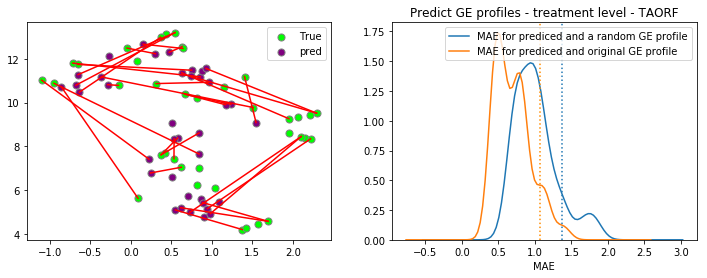

In [40]:
visualizePredictionResults(pred_ge_mlpPlus)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


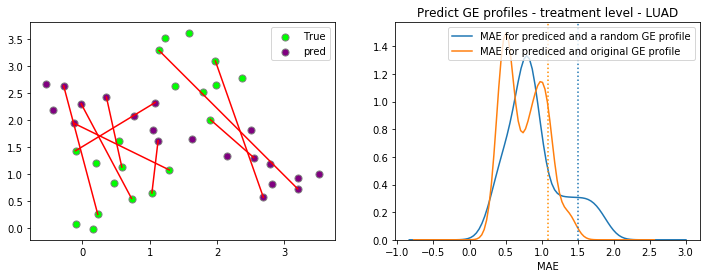

In [164]:
visualizePredictionResults()

In [76]:
# visualizePredictionResults()

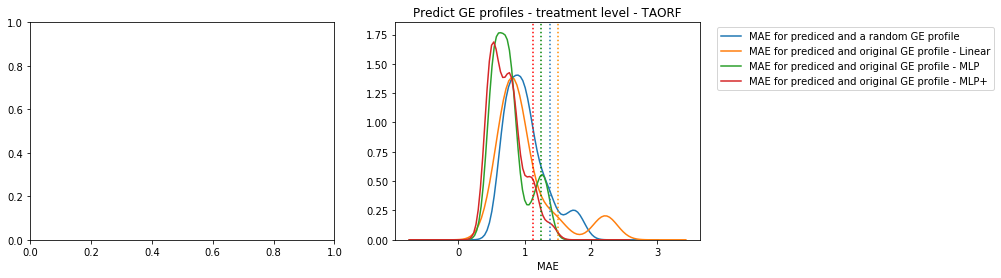

In [77]:
ge_test=l1k_test.copy()
# predicted_ge = pd.DataFrame(data=pred_ge, columns=l1k_features)
# predicted_ge[pertColName] = cp_test[pertColName]
# predicted_ge = predicted_ge[[pertColName] + l1k_features]

###########
ccSameLin=[]
ccSameMlp=[]
ccSameMlpPlus=[]
ccRandom=[]
np.random.seed(0)
for i in range(pred_ge_mlp.shape[0]):
#         ccSame.append(scipy.stats.pearsonr(pred_ge[i,:], l1k_test.loc[i,l1k_features].values)[0])
#         ccRandom.append(scipy.stats.pearsonr(l1k_train.loc[np.random.choice(np.random.choice(l1k_train.shape[0],1)),l1k_features].values, l1k_test.loc[i,l1k_features].values)[0])
    ccSameLin.append(mean_absolute_error(pred_ge_l[i,:], l1k_test.loc[i,l1k_features].values))
    ccSameMlp.append(mean_absolute_error(pred_ge_mlp[i,:], l1k_test.loc[i,l1k_features].values))
    ccSameMlpPlus.append(mean_absolute_error(pred_ge_mlpPlus[i,:], l1k_test.loc[i,l1k_features].values))
    ccRandom.append(mean_absolute_error(l1k_train.loc[np.random.choice(np.random.choice(l1k_train.shape[0],1)),l1k_features].values, l1k_test.loc[i,l1k_features].values))

#     title=['Predict GE profiles - Linear Transformation']
fig, axes = plt.subplots(1,2, figsize=(12,4))
# sns.kdeplot(x)
i=0
sns.kdeplot(ccRandom, bw=.4, label="MAE for prediced and a random GE profile",ax=axes[1])
sns.kdeplot(ccSameLin, bw=.4, label="MAE for prediced and original GE profile - Linear",ax=axes[1]);
sns.kdeplot(ccSameMlp, bw=.4, label="MAE for prediced and original GE profile - MLP",ax=axes[1]);
sns.kdeplot(ccSameMlpPlus, bw=.4, label="MAE for prediced and original GE profile - MLP+",ax=axes[1]);
axes[1].set_xlabel('MAE');
perc5=np.percentile(ccSameLin, 90);axes[1].axvline(x=perc5,linestyle=':',color='darkorange');
perc5=np.percentile(ccSameMlp, 90);axes[1].axvline(x=perc5,linestyle=':',color='green');
perc5=np.percentile(ccSameMlpPlus, 90);axes[1].axvline(x=perc5,linestyle=':',color='red');
perc5r=np.percentile(ccRandom, 90);axes[1].axvline(x=perc5r,linestyle=':');
axes[1].legend(bbox_to_anchor=(1.04,1),loc='upper left');axes[1].set_title('Predict GE profiles - '+profileLevel+' level - '+dataset);

In [52]:
pred_ge_mlpPlus.shape

(38, 978)

# Train "MLP+Reconstruction loss+disc" and Test

In [12]:
pred_ge=nnTransformWithCycleAndDis(l1k_train,cp_train,l1k_test,cp_test)

NameError: name 'nnTransformWithCycleAndDis' is not defined

In [49]:
# visualizePredictionResults()

ge_test=l1k_test.copy()
predicted_ge = pd.DataFrame(data=pred_ge, columns=l1k_features)
predicted_ge[pertColName] = cp_test[pertColName]
predicted_ge = predicted_ge[[pertColName] + l1k_features]

predicted_ge["Real"] = False
ge_test["Real"] = True

compare_ge = pd.concat([ge_test, predicted_ge]).reset_index(drop=True)
# Compute tSNE
#     reload(tsne)
X = np.asarray(compare_ge)[:,1:-1]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [53]:
# compare_ge
compare_ge.head()

,Cells_AreaShape_Center_X,Cells_AreaShape_Compactness,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Orientation,Cells_AreaShape_Perimeter,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,...,Nuclei_Texture_SumEntropy_ER_10_0,Nuclei_Texture_SumEntropy_Mito_3_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_ER_10_0,Nuclei_Texture_SumVariance_RNA_10_0,Nuclei_Texture_Variance_AGP_10_0,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_RNA_10_0,Real
0,0.881409,0.086030,-0.275946,-0.314893,-0.856448,-0.080513,-0.366901,0.302353,0.228469,0.041968,...,-0.628846,-0.863331,-1.087220,-0.371796,-0.526384,-0.119773,-0.220448,-0.277705,-0.738342,True
1,0.552326,0.404938,-0.266871,0.027151,0.146209,0.050922,-0.061251,-0.160125,0.017700,0.098312,...,-0.496272,-0.040129,0.188155,-0.280894,-0.180040,0.096964,-0.205470,-0.097545,0.002585,True
2,0.682494,-0.595798,0.141791,0.223541,0.741823,-0.257660,-0.069310,0.951033,0.720999,0.087371,...,-0.199595,0.183709,0.029148,-0.298869,0.154311,0.157020,-0.028326,0.197363,-0.094408,True
3,-0.566635,-0.431083,0.047120,-0.155361,0.366188,-0.212481,-0.420902,0.710232,0.620540,-0.251999,...,-0.543873,-0.075905,-0.508379,-0.299085,-0.647849,0.317258,-0.408176,0.002093,-0.732391,True
4,0.635780,-0.401705,0.004677,-0.360510,1.069209,-0.039921,-0.404971,0.627182,0.496268,-0.596188,...,0.205370,0.289546,0.217040,0.061627,0.330196,-0.047471,0.301695,0.186065,-0.062334,True


In [38]:
def visualizePredictionResults(pred_ge):
    ge_test=l1k_test.copy()
    predicted_ge = pd.DataFrame(data=pred_ge, columns=l1k_features)
    predicted_ge[pertColName] = cp_test[pertColName]
    predicted_ge = predicted_ge[[pertColName] + l1k_features]

    predicted_ge["Real"] = False
    ge_test["Real"] = True

    compare_ge = pd.concat([ge_test, predicted_ge]).reset_index(drop=True)
    # Compute tSNE
#     reload(tsne)
    X = np.asarray(compare_ge[l1k_features])
    X = np.asarray(X, dtype=np.float)
#     Y = tsne.tsne(X)
    umapT=umap.UMAP()
    Y = umapT.fit_transform(X)

    compare_ge["X"] = Y[:,0]
    compare_ge["Y"] = Y[:,1]
    # sns.lmplot(data=compare_ge, x="X", y="Y", hue="Real", fit_reg=False)
    #########
    M1 = Y[0:ge_test.shape[0],0:2]
    M2 = Y[ge_test.shape[0]:,0:2]
    D = scipy.spatial.distance_matrix(M1, M2,p=1)
#     D = scipy.spatial.distance_matrix(ge_test[l1k_features].values, predicted_ge[l1k_features].values,p=1)
    NN = np.argsort(D, axis=1) # Nearest morphology point to each gene expression point
    ###########
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    axes[0].scatter(M1[:,0], M1[:,1], c="lime", s=50, edgecolor='gray', linewidths=1,label='True')
    axes[0].scatter(M2[:,0], M2[:,1], c="purple", s=50, edgecolor='gray', linewidths=1,label='pred')
    axes[0].legend()
    for i in range(M2.shape[0]):
        for j in range(M1.shape[0]):
            if predicted_ge.iloc[i][pertColName] == ge_test.iloc[NN[j,i]][pertColName]:
                axes[0].plot([M1[NN[j,i],0],M2[i,0]],[M1[NN[j,i],1],M2[i,1]], 'k-', color="red")
                break
    ###########
    ccSame=[]
    ccRandom=[]
    np.random.seed(0)
    for i in range(pred_ge.shape[0]):
#         ccSame.append(scipy.stats.pearsonr(pred_ge[i,:], l1k_test.loc[i,l1k_features].values)[0])
#         ccRandom.append(scipy.stats.pearsonr(l1k_train.loc[np.random.choice(np.random.choice(l1k_train.shape[0],1)),l1k_features].values, l1k_test.loc[i,l1k_features].values)[0])
        ccSame.append(mean_absolute_error(pred_ge[i,:], l1k_test.loc[i,l1k_features].values))
        ccRandom.append(mean_absolute_error(l1k_train.loc[np.random.choice(np.random.choice(l1k_train.shape[0],1)),l1k_features].values, l1k_test.loc[i,l1k_features].values))

#     title=['Predict GE profiles - Linear Transformation']
    # fig, axes = plt.subplots()#(1,1,sharey='row', figsize=(12,6))
    # sns.kdeplot(x)
    i=0
    sns.kdeplot(ccRandom, bw=.4, label="MAE for prediced and a random GE profile",ax=axes[1])
    sns.kdeplot(ccSame, bw=.4, label="MAE for prediced and original GE profile",ax=axes[1]);axes[1].set_xlabel('MAE');
    perc5=np.percentile(ccSame, 90);axes[1].axvline(x=perc5,linestyle=':',color='darkorange');
    perc5r=np.percentile(ccRandom, 90);axes[1].axvline(x=perc5r,linestyle=':');
    axes[1].legend();axes[1].set_title('Predict GE profiles - '+profileLevel+' level - '+dataset);
    return

In [113]:
pred_ge

array([[-0.45335644, -1.78513149,  1.09966506, ..., -1.43615029,
        -0.70882871, -0.03331259],
       [ 0.32498337,  0.04983415,  5.26883362, ...,  0.81093095,
        -0.42516633,  0.53198664],
       [ 0.80583137, -0.05723192,  1.29876396, ...,  1.42539214,
         0.4829636 ,  0.1077099 ],
       ...,
       [ 0.24807353,  0.14763411,  3.18995015, ...,  0.76981795,
         0.48294939,  0.92253088],
       [-0.87617515,  1.23511286,  2.61415923, ...,  0.38831804,
         1.49203778, -0.55078833],
       [-0.30627862, -0.75443715, -0.24569912, ...,  1.85677814,
         0.08129859, -0.12181895]])

In [40]:
Y.shape

(20, 2)

In [15]:
# l1k.loc[l1k[pertColName]=='BFP']
['MAPK7_WT.c','ARAF_p.S214C','AKR1B1_p.P14R','PPP2R1A_p.V229L','PPP2R1A_p.Q372L',\
'IDH2_p.K130del','IDH2_p.S249G','RIT1_p.F82L','RIT1_p.A77P','RBM10_p.W658Y']

,Allele,201000_at,203192_at,209380_s_at,200045_at,202394_s_at,218581_at,221552_at,202123_s_at,214274_s_at,...,212124_at,202778_s_at,214741_at,204937_s_at,203521_s_at,218149_s_at,212557_at,219711_at,219968_at,204812_at
25,BFP,-0.370653,0.143598,-1.108784,0.712562,0.475342,1.358183,0.122358,0.351188,0.098923,...,-1.249839,0.130071,0.829537,0.9562,-0.494023,0.341541,0.617284,-0.368283,0.088207,-0.207463


In [43]:
l1k_test.shape, pred_ge.shape

((20, 979), (20, 978))

In [7]:
import tensorflow as tf

# Models

In [172]:
# from keras.engine.topology import Network
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
def nnTransformWithCycleAndDis(al1k_train,acp_train,al1k_test,acp_test):
    experiment = comet_ml.Experiment(
            api_key='wRu2GizrrhvMrx22c5346ocuq',
            project_name='Rosetta'
        )
    # mp to gene expression
    configuration = tf.ConfigProto()
    configuration.gpu_options.allow_growth = True
    configuration.gpu_options.visible_device_list = "0"
    session = tf.Session(config = configuration)

    tf.keras.backend.set_session(session)
    #     image_ge = keras.layers.Input(shape=[al1k_train.shape[1]-1,1])
    #     image_ge = keras.layers.Input(shape=[al1k_train.shape[1]-1])
    #     input_img = keras.layers.Input(shape=[img_shape,1])
    #     image_ge2 = keras.backend.expand_dims(image_ge,axis=-1)
    #     D_ge_0=modelDiscriminator2(image_ge)
    image_ge, guess_ge=modelDiscriminator2(al1k_train.shape[1]-1)
    #     D_ge_1=Model(inputs=image_ge, outputs=net, name='dis_B')

    #     image_ge = keras.layers.Input([al1k_train.shape[1]-1])
    #     D_ge_0=modelDiscriminator([al1k_train.shape[1]-1])

    #     guess_ge=D_ge_1(image_ge)
    D_ge = Model(inputs=image_ge, outputs=guess_ge, name='D_ge_model')
    lr_D=2e-4;beta_1 = 0.5;beta_2 = 0.999
    D_ge.compile(optimizer=Adam(lr_D,beta_1,beta_2),loss='mse',loss_weights=[0.5])

    #     D_ge_static = Network(inputs=image_ge, outputs=guess_ge, name='D_ge_static_model')

    real_mp, synthetic_ge= networksEvol.mp2ge_net(acp_train.shape[1]-1, al1k_train.shape[1]-1)
    G_A2B=Model(inputs=real_mp, outputs=synthetic_ge, name='g_A2B')
    #     print(real_mp,synthetic_ge,image_ge,keras.backend.squeeze(image_ge,2))
    # identity mapping
    #     image_ge_i=G_A2B(image_ge)
    synthetic_mp= networksEvol.ge2mp_net(image_ge,al1k_train.shape[1]-1,acp_train.shape[1]-1)
    image_ge_i=G_A2B(synthetic_mp)
    #     print(image_ge,synthetic_mp,image_ge_i)
    #     d_ge_guess_synthetic = D_ge_static(synthetic_ge)

    #     synthetic_ge = mp2ge_net(real_mp)
    reconstructed_mp = networksEvol.ge2mp_net(synthetic_ge,al1k_train.shape[1]-1,acp_train.shape[1]-1)

    valid_ge=D_ge(synthetic_ge)
    #     model_outputs = [synthetic_ge, reconstructed_mp,d_ge_guess_synthetic]
    #     model_outputs = [reconstructed_mp,image_ge_i]
    model_outputs = [reconstructed_mp,valid_ge]
    # print(real_mp, model_outputs)
    model_combined = Model(inputs=[real_mp,image_ge], outputs=model_outputs)
    compile_losses=['mae','mse']
    compile_weights=[10,1]
    model_combined.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss=compile_losses,loss_weights=compile_weights,metrics=['mae', networksEvol.pcc])   

    #     cycleEnable=True    

    #     dgen_train = MultimodalDataGenerator(acp_train, al1k_train,cycleEnable)
    #     dgen_test = MultimodalDataGenerator(acp_test, al1k_test,cycleEnable)

    #     cb=keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01,patience=5, min_lr=0.0001)

    #     callback_csv = keras.callbacks.CSVLogger(filename="../../results/modelW/log_c.csv")
    #     callbacks = [cb, callback_csv]
    #     model.fit_generator(generator=dgen_train, steps_per_epoch=5,epochs=300,verbose=0,\
    #                         validation_data=(acp_test.iloc[:,1:].values, [al1k_test.iloc[:,1:].values,acp_test.iloc[:,1:].values]),callbacks=callbacks)

    epochs=50
    steps=100
    uniAls=acp_train['Allele'].unique()
    for epoch in range(epochs):        
        batch_of_alleles=uniAls[np.random.randint(uniAls.shape[0],size=steps)]
        for batch_i in range(steps):
            im_A_0=acp_train.loc[acp_train['Allele']==batch_of_alleles[batch_i],acp_train.columns[1:]].values;
            im_B_0=al1k_train.loc[al1k_train['Allele']==batch_of_alleles[batch_i],al1k_train.columns[1:]].values;
            real_images_A=np.copy(im_A_0)
            np.random.shuffle(real_images_A)
            real_images_A=real_images_A[0:16,:]
            real_images_B=np.copy(im_B_0)
            np.random.shuffle(real_images_B)
            real_images_B=real_images_B[0:16,:]

            # ======= Discriminator training ==========
    #         print(im_A_0.shape)
            synthetic_images_B = G_A2B.predict(real_images_A,steps=1)

            batch_size=im_B_0.shape[0]
            label_shape = (batch_size,) + D_ge.output_shape[1:]
            ones = np.ones(shape=label_shape) 
            zeros = ones * 0    

    #             synthetic_images_A = self.G_B2A.predict(real_images_B)
    #             synthetic_images_A = synthetic_pool_A.query(synthetic_images_A)
    #             synthetic_images_B = synthetic_pool_B.query(synthetic_images_B)
    #             DA_loss_real = self.D_ge.train_on_batch(x=real_images_A, y=ones)
    #       y=tf.ones_like(real_images_B)
#             print(real_images_B.shape,ones.shape)
            DB_loss_real = D_ge.train_on_batch(x=real_images_B, y=ones)
    #             DA_loss_synthetic = self.D_ge.train_on_batch(x=synthetic_images_A, y=zeros)
#             print(real_images_B.shape,synthetic_images_B.shape)
            DB_loss_synthetic = D_ge.train_on_batch(x=synthetic_images_B, y=zeros)
    #             DA_loss = DA_loss_real + DA_loss_synthetic
            DB_loss = DB_loss_real + DB_loss_synthetic
    #             D_loss = DA_loss + DB_loss            


            # ======= Generator training ==========
            target_data=[real_images_A,ones[0:real_images_A.shape[0]]]
            G_loss = model_combined.train_on_batch(x=[real_images_A, real_images_B[0:real_images_A.shape[0],:]], y=target_data)

            gA_d_loss_synthetic = G_loss[1]
            gB_d_loss_synthetic = G_loss[2]
            reconstruction_loss_A = G_loss[3]
            reconstruction_loss_B = G_loss[4]

            print('epoch:',epoch,'batch:',batch_i,'G_loss:',G_loss,'D_loss:',DB_loss)

        predicted_ge = G_A2B.predict(np.asarray(acp_test)[:,1:])
#             #     print(predicted_ge.shape, al1k_test.shape)
#             #     cc=scipy.stats.pearsonr(predicted_ge[0].T, al1k_test.iloc[:,1:].values.T)
#             cc=scipy.stats.pearsonr(predicted_ge.mean(axis=0).T, al1k_test.iloc[:,1:].values.mean(axis=0).T)
#             print(cc)
    return predicted_ge

In [147]:
from keras_contrib.layers import InstanceNormalization
def ck(x, k, use_normalization):
    x = keras.layers.Conv1D(filters=k, kernel_size=4, strides=2, padding='same')(x)
    # Normalization is not done on the first discriminator layer
    if use_normalization:
        x = InstanceNormalization(axis=2, center=True, epsilon=1e-5)(x, training=True)
    x = keras.layers.LeakyReLU(alpha=0.2)(x)
    return x

def modelDiscriminator(input_img, name=None):
    # Specify input 
#     input_img = keras.layers.Input(shape=[img_shape,1])
#     input_img1=keras.backend.expand_dims(input_img,axis=-1)
    # Layer 1 (#Instance normalization is not used for this layer)
    x = ck(input_img, 64, False)
    # Layer 2
    x = ck(x, 128, True)
    # Layer 3
    x = ck(x, 256, True)
    # Layer 4
    x = ck(x, 512, True)
    # Output layer
    use_patchgan=False
    if use_patchgan:
        x = keras.layers.Conv2D(filters=1, kernel_size=4, strides=1, padding='same')(x)
    else:
        x = keras.layers.Flatten()(x)
        x = keras.layers.Dense(1)(x)
    x = keras.layers.Activation('sigmoid')(x)
#     print(input_img,x)
    return Model(inputs=input_img, outputs=x, name=name)

def modelDiscriminator3(in_size, name=None):
    inLayer2 = keras.layers.Input([in_size])
    inputt=keras.layers.Reshape(in_size + (1, ), input_shape=in_size)(inLayer2)
    x = ck(inputt, 64, False)
    # Layer 2
    x = ck(x, 128, True)
    # Layer 3
    x = ck(x, 256, True)
    # Layer 4
    x = ck(x, 512, True)
    # Output layer
    use_patchgan=False
    if use_patchgan:
        x = keras.layers.Conv2D(filters=1, kernel_size=4, strides=1, padding='same')(x)
    else:
        x = keras.layers.Flatten()(x)
        x = keras.layers.Dense(1)(x)
    net = keras.layers.Activation('sigmoid')(x)
    return inLayer2,net

def modelDiscriminator2(in_size, name=None):
    inLayer2 = keras.layers.Input([in_size])
    net = keras.layers.Dense(64, activation="relu")(inLayer2)
    net = keras.layers.BatchNormalization()(net)
    net = keras.layers.Dense(128, activation="relu")(net)
    net = keras.layers.BatchNormalization()(net)
    net = keras.layers.Dropout(0.5)(net)
    net = keras.layers.Dense(512, activation="relu")(net)
    net = keras.layers.BatchNormalization()(net)
    net = keras.layers.Dropout(0.5)(net)
    net = keras.layers.Dense(1, activation=None)(net)
    net = keras.layers.Activation('sigmoid')(net)
    return inLayer2,net